In [2]:
print("Dealing with Imbalanced Classes")

Dealing with Imbalanced Classes


#### 1. Imbalanced Classes & Impact
- Data with skewed class distribution.
- Common examples are spam/ham mails, malicious/normal packets.
- Classification algorithms are prone to predict data with heavier class.
- Accuracy_score is not the right matrix.
- We got to rely on matrices like confusion_matrix, recall, precision

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.datasets import make_blobs
import numpy as np
from sklearn.metrics import confusion_matrix
from collections import Counter

In [4]:
n_samples_1 = 1000
n_samples_2 = 100
centers = [[0.0, 0.0], [2.0, 2.0]]
clusters_std = [1.5, 0.5]
X, y = make_blobs(n_samples=[n_samples_1, n_samples_2],
                  centers=centers,
                  cluster_std=clusters_std,
                  random_state=0, shuffle=False)

In [5]:
plt.scatter(X[:,0], X[:,1],s=10,c=y)

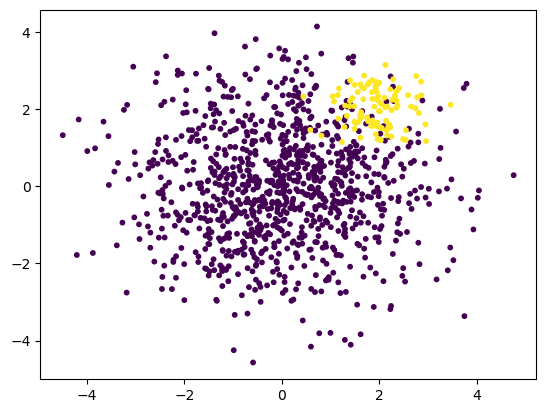

In [6]:
plt.show()

In [7]:
from sklearn.svm import SVC

In [8]:
svc = SVC(kernel='linear')

In [9]:
svc.fit(X,y)

SVC(kernel='linear')

In [10]:
h = .02
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

In [11]:
Z = svc.predict(np.c_[xx.ravel(), yy.ravel()])

In [12]:
Z = Z.reshape(xx.shape)
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)
plt.scatter(X[:,0],X[:,1],c=y,s=10)

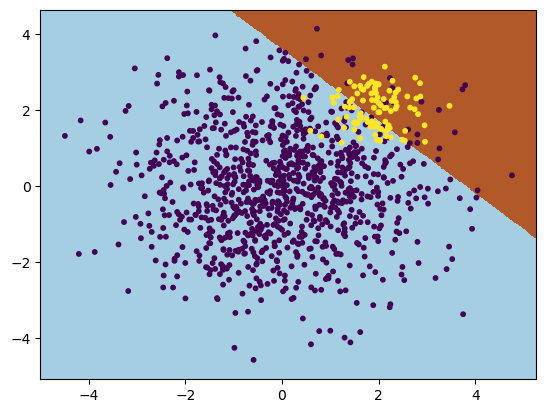

In [13]:
plt.show()

- As we can see, decision boundry is impacted
- imbalanced package provides many such sampling techniques - pip install imbalanced
#### 2. OverSampling
- One way to fight this issue is to generate new samples in the classes which are under-represented.
- The most naive strategy is to generate new samples by randomly sampling with replacement the current available samples.
- RandomOverSampler is simpliest api to provide such functionality
##### RandomOverSampler

In [14]:
from sklearn.datasets import make_classification
X, y = make_classification(n_samples=5000, n_features=2, n_informative=2,
                            n_redundant=0, n_repeated=0, n_classes=3,
                            n_clusters_per_class=1,
                            weights=[0.01, 0.05, 0.94],
                            class_sep=0.8, random_state=0)

In [15]:
plt.scatter(X[:,0], X[:,1],s=5,c=y)

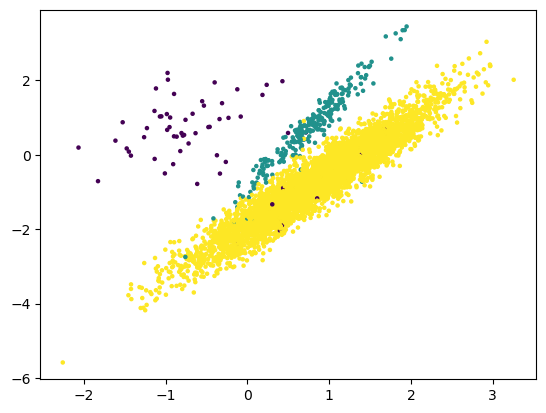

In [16]:
plt.show()

In [17]:
svc.fit(X,y)

SVC(kernel='linear')

In [18]:
h = .02
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

In [19]:
Z = svc.predict(np.c_[xx.ravel(), yy.ravel()])

In [20]:
Z = Z.reshape(xx.shape)
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)
plt.scatter(X[:,0],X[:,1],c=y,s=10)

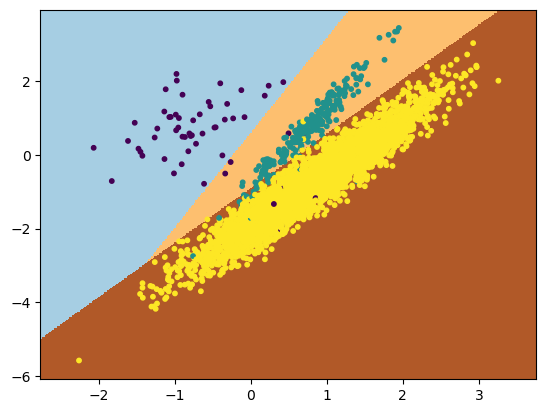

In [21]:
plt.show()

In [22]:
from imblearn.over_sampling import RandomOverSampler

In [34]:
ros = RandomOverSampler(random_state=0)
# Initialize RandomOverSampler
#ros = RandomOverSampler(random_state=42)

In [35]:
#X_resampled, y_resampled = ros.fit_sample(X,y)
#The fit_sample method has been deprecated in the imbalanced-learn library since version 0.4 and replaced with the fit_resample method.
X_resampled, y_resampled = ros.fit_resample(X,y)

In [36]:
plt.scatter(X_resampled[:,0],X_resampled[:,1],c=y_resampled,s=10)

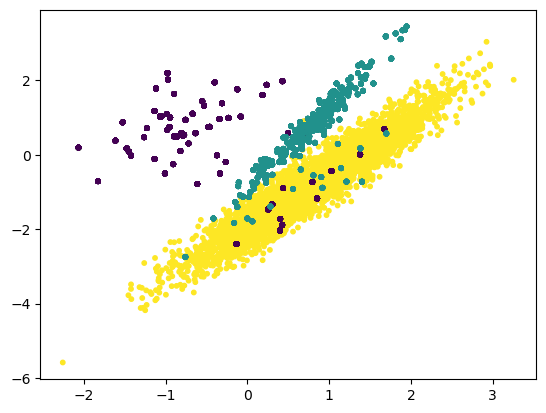

In [37]:
plt.show()

In [40]:
svc.fit(X_resampled,y_resampled)

SVC(kernel='linear')

In [41]:
Z = svc.predict(np.c_[xx.ravel(), yy.ravel()])

In [42]:
Z = Z.reshape(xx.shape)
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)
plt.scatter(X[:,0],X[:,1],c=y,s=10)

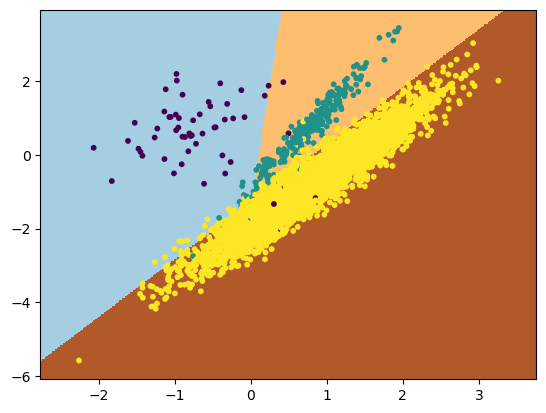

In [43]:
plt.show()

In [45]:
pred = svc.predict(X)
confusion_matrix(y_pred=pred, y_true=y)

#Diagonal values represents correct classification, while
#Below values respresent mis-classification

array([[  49,    3,   12],
       [   9,  237,   16],
       [  38,   53, 4583]], dtype=int64)

#### SMOTE (Synthetic Minority Oversampling Technique)
- Generates new samples by interpolation
- It doesn't duplicates data

In [47]:
from imblearn.over_sampling import SMOTE

In [51]:
#X_resampled, y_resampled = SMOTE().fit_sample(X, y)
#remember it is fit.resample()

X_resampled, y_resampled = SMOTE().fit_resample(X, y)

In [52]:
plt.scatter(X_resampled[:,0],X_resampled[:,1],c=y_resampled,s=10)

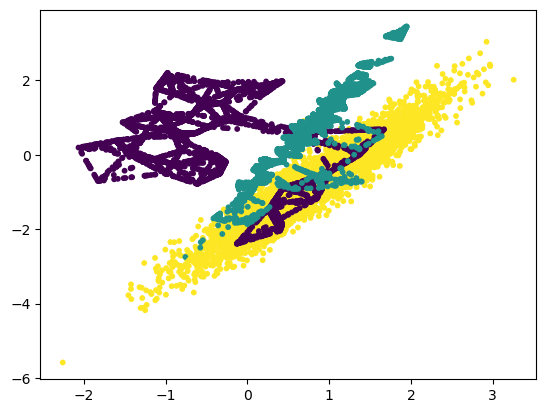

In [53]:
plt.show()

In [54]:
svc.fit(X_resampled,y_resampled)

SVC(kernel='linear')

In [55]:
Z = svc.predict(np.c_[xx.ravel(), yy.ravel()])

In [56]:

Z = Z.reshape(xx.shape)
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)
plt.scatter(X[:,0],X[:,1],c=y,s=10)

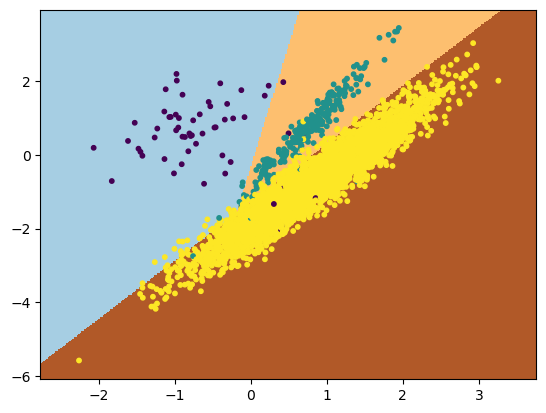

In [57]:
plt.show()

In [58]:
pred = svc.predict(X)
confusion_matrix(y_pred=pred, y_true=y)

array([[  49,    3,   12],
       [   4,  242,   16],
       [  33,   62, 4579]], dtype=int64)


#### ADASYN (Adaptive Synthetic Sampling Method)
- Similar to SMOTE, this also generates data.
- Generate samples to the original which are wrongly mis-classified
- SMOTE doen't consider this situation

In [59]:
from imblearn.over_sampling import ADASYN

In [61]:
X_resampled, y_resampled = ADASYN().fit_resample(X, y)

In [62]:
plt.scatter(X_resampled[:,0],X_resampled[:,1],c=y_resampled,s=10)

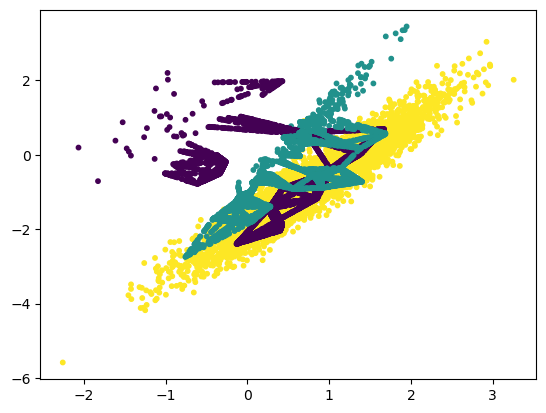

In [63]:
plt.show()

In [64]:
svc.fit(X_resampled,y_resampled)

SVC(kernel='linear')

In [65]:
Z = svc.predict(np.c_[xx.ravel(), yy.ravel()])

In [66]:
Z = Z.reshape(xx.shape)
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)
plt.scatter(X[:,0],X[:,1],c=y,s=10)

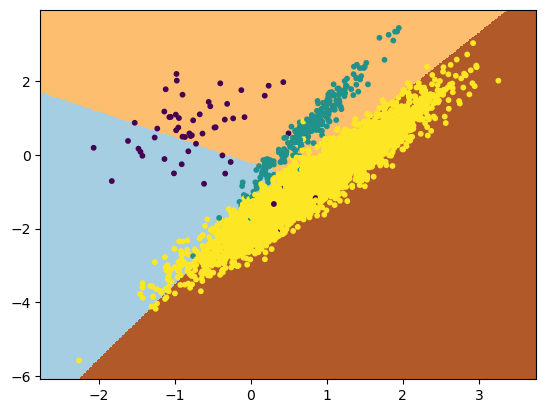

In [67]:
plt.show()

In [68]:
pred = svc.predict(X)
confusion_matrix(y_pred=pred, y_true=y)

array([[  15,   37,   12],
       [  28,  222,   12],
       [ 332,  148, 4194]], dtype=int64)

### Undersampling
- Reducing the data of the over-represented class
- RandomUnderSampler
- The reduced data is picked randomly from the sample & not derived

In [69]:
from imblearn.under_sampling import RandomUnderSampler

In [70]:
rus = RandomUnderSampler(random_state=0)

In [72]:
X_resampled, y_resampled = rus.fit_resample(X, y)

In [73]:
plt.scatter(X[:,0],X[:,1],c=y,s=10)

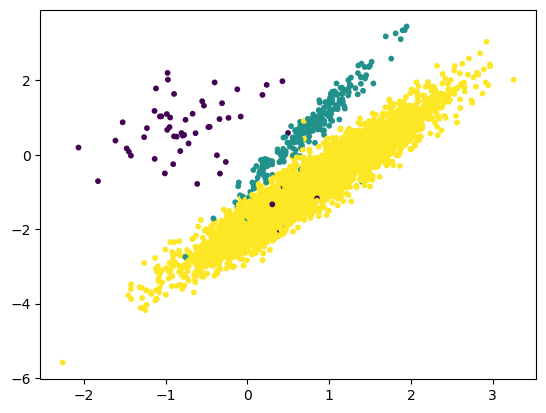

In [74]:
plt.show()

In [75]:
plt.scatter(X_resampled[:,0],X_resampled[:,1],c=y_resampled,s=10)

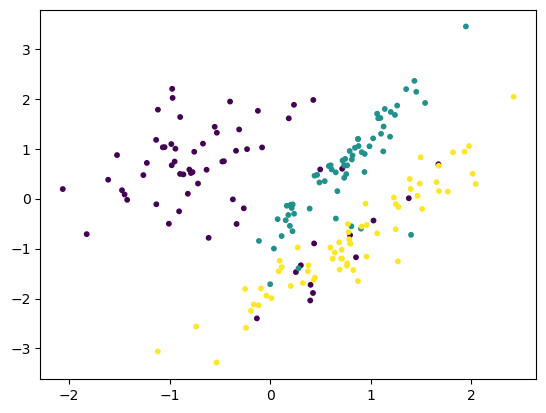

In [76]:
plt.show()

In [77]:
print(sorted(Counter(y).items()))

[(0, 64), (1, 262), (2, 4674)]


In [78]:
print(sorted(Counter(y_resampled).items()))

[(0, 64), (1, 64), (2, 64)]


#### ClusterCentroid for data generation
- Generating representative data using kmeans
- Centroids of clusters are used

In [79]:
from imblearn.under_sampling import ClusterCentroids

In [80]:
cc = ClusterCentroids(random_state=0)

In [82]:
X_resampled, y_resampled = cc.fit_resample(X, y)

In [83]:
plt.scatter(X_resampled[:,0],X_resampled[:,1],c=y_resampled,s=10)

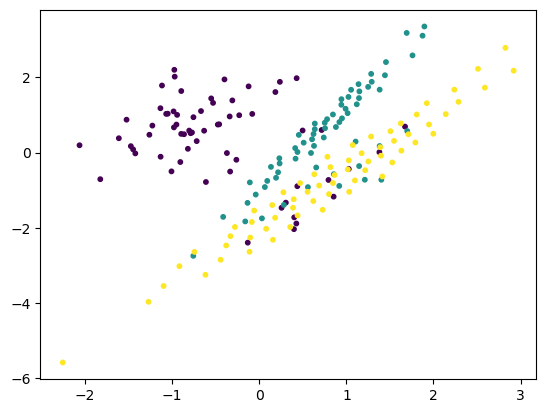

In [84]:
plt.show()


#### Connecting Sampler to Pipelines
- We can any of these sampler to be part of pipeline so that we can validate them
- scikit pipeline is not capable of dealing with samplers & we have to use overridden pipeline by imblearn

In [85]:
from imblearn.pipeline import make_pipeline

In [86]:
pipeline1 = make_pipeline(RandomOverSampler(),SVC(kernel='linear'))

In [87]:
pipeline2 = make_pipeline(RandomUnderSampler(),SVC(kernel='linear'))

In [88]:
pipelines = [pipeline1,pipeline2]

In [89]:
for pipeline in pipelines:
    pipeline.fit(X,y)

In [90]:
for sampling_type, pipeline in zip(['oversampler','undersampler'],pipelines):
    pred = pipeline.predict(X)
    print (sampling_type, '\n',confusion_matrix(y_pred=pred, y_true=y))
    print ('\n')

oversampler 
 [[  49    3   12]
 [   3  243   16]
 [  32   64 4578]]


undersampler 
 [[  49    3   12]
 [  11  233   18]
 [   6   55 4613]]




#### Making learning algorithms aware of class distribution
- Most of the classfication algorithms provides a method to pass class distribution information
- Internally, learning algorithm uses this & configures itself for justifying under represented class

In [91]:
from sklearn.svm import SVC

In [92]:
svc = SVC(kernel='linear')

In [93]:
svc.fit(X,y)

SVC(kernel='linear')

In [99]:
pred = svc.predict(X)

In [96]:
confusion_matrix(y_pred=pred, y_true=y)

array([[  48,    4,   12],
       [   0,  230,   32],
       [   0,    4, 4670]], dtype=int64)

In [97]:
svc = SVC(kernel='linear', class_weight='balanced')

In [98]:
svc.fit(X,y)

SVC(class_weight='balanced', kernel='linear')

In [100]:
pred = svc.predict(X)

In [101]:
confusion_matrix(y_pred=pred, y_true=y)

array([[  49,    3,   12],
       [   3,  243,   16],
       [  28,   62, 4584]], dtype=int64)

### Anomaly Detection
- Under represented data can be considered anomaly.
- Using anomaly detection techniques to identify anomaly in data.
- Validating it with class info

In [102]:
n_samples_1 = 1000
n_samples_2 = 100
centers = [[0.0, 0.0], [3.5, 3.5]]
clusters_std = [1.5, 0.5]
X, y = make_blobs(n_samples=[n_samples_1, n_samples_2],
                  centers=centers,
                  cluster_std=clusters_std,
                  random_state=0, shuffle=False)

In [103]:
plt.scatter(X[:,0], X[:,1],s=10,c=y)

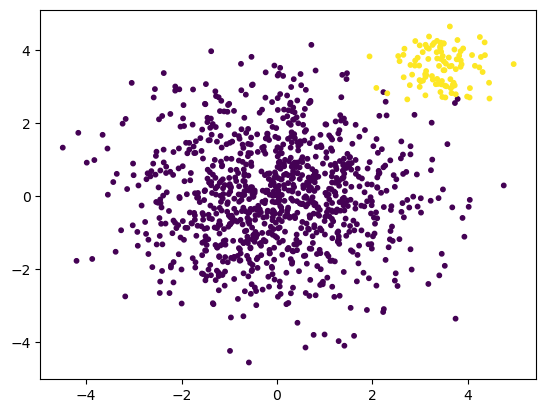

In [104]:
plt.show()

In [105]:
from sklearn.cluster import MeanShift

In [106]:
ms = MeanShift(bandwidth=2, n_jobs=-1)

In [107]:
ms.fit(X)

MeanShift(bandwidth=2, n_jobs=-1)

In [108]:
pred = ms.predict(X)

In [109]:
plt.scatter(X[:,0], X[:,1],s=10,c=pred)

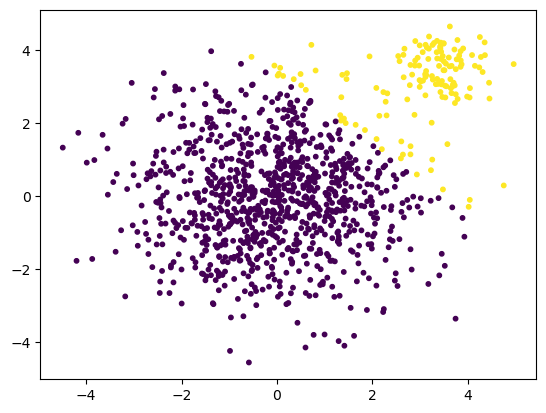

In [110]:
plt.show()

In [112]:
from sklearn.covariance import EllipticEnvelope

In [113]:
en = EllipticEnvelope(contamination=.1)

In [115]:
en.fit(X)

EllipticEnvelope()

In [116]:
pred = en.predict(X)

In [117]:
plt.scatter(X[:,0], X[:,1], s=10, c=pred)

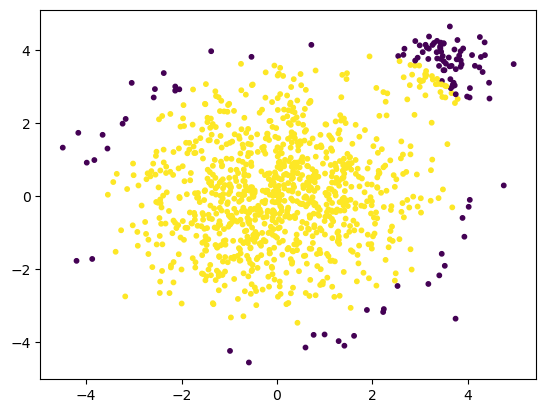

In [118]:
plt.show()